In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Path to the dataset
data_path = "dataset/inputs.csv"  # Update path as needed

# Load the dataset
df = pd.read_csv(data_path)

# Display the first few rows
print("Dataset Preview:")
df.head()

In [ ]:
# Basic dataset information
print("Dataset Dimensions:")
print(f"Number of patients: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Check data types and missing values
print("\nDataset Info:")
df.info()

# Summary statistics for numerical columns
print("\nNumerical Features Summary:")
df.describe()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print("\nExplained Variance Ratios:")
print(explained_variance_df)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Identify categorical and numerical columns
categorical_columns = ['State', 'Sex', 'GeneralHealth', 'AgeCategory', 
                       'ECigaretteUsage', 'RaceEthnicityCategory', 'TetanusLast10Tdap']
numerical_columns = [col for col in df.columns if col not in categorical_columns and df[col].dtype in ['int64', 'float64']]

# Apply one-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Preprocess the data
df_preprocessed = preprocessor.fit_transform(df)

df_preprocessed

# import ace_tools as tools; tools.display_dataframe_to_user(name="Explained Variance Ratios", dataframe=explained_variance_df)

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(df_preprocessed)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print("\nExplained Variance Ratios:")
print(explained_variance_df)

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Path to the dataset
data_path = "dataset/inputs.csv"  # Update path as needed

# Load the dataset
df = pd.read_csv(data_path)

# Display the first few rows
print("Dataset Preview:")
df.head()

Dataset Preview:


,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,1,0,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,8,Alaska,Female,Fair,Age 60 to 64,1.70,87.540001,30.230000,0,0,...,Never used e-cigarettes in my entire life,0,"Black only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,0


In [16]:
le = LabelEncoder()

catcols = df.select_dtypes(include='object')

for i in catcols:
    df[i] = le.fit_transform(df[i])
    
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadAngina,HadStroke,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,1,11,1.63,84.820000,32.099998,1,0,...,0,1,4,0,0,0,1,0,0,1
1,2,0,0,4,9,1.60,71.669998,27.990000,0,0,...,0,0,4,0,0,1,1,1,0,0
2,3,0,1,0,8,1.78,71.209999,22.530001,0,0,...,0,0,4,1,0,0,0,2,0,0
3,4,0,1,4,10,1.78,95.250000,30.129999,0,0,...,0,0,4,0,0,1,1,2,0,0
4,8,1,0,1,8,1.70,87.540001,30.230000,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print("\nExplained Variance Ratios:")
print(explained_variance_df)


Explained Variance Ratios:
   Principal Component  Explained Variance Ratio
0                  PC1                  0.102505
1                  PC2                  0.072848
2                  PC3                  0.064728
3                  PC4                  0.058050
4                  PC5                  0.047409
5                  PC6                  0.040208
6                  PC7                  0.035270
7                  PC8                  0.032763
8                  PC9                  0.029735
9                 PC10                  0.029554
10                PC11                  0.028881
11                PC12                  0.028478
12                PC13                  0.028240
13                PC14                  0.027715
14                PC15                  0.026704
15                PC16                  0.025939
16                PC17                  0.025837
17                PC18                  0.025438
18                PC19                  0

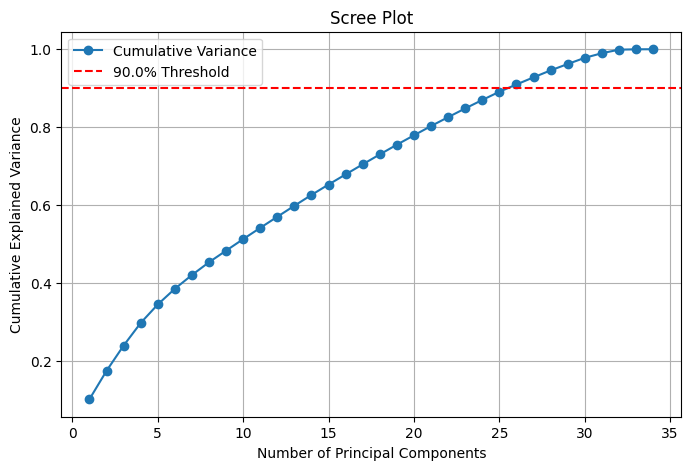

In [18]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Refit PCA to ensure components are available
# import ace_tools as tools

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Extract PCA loadings
loadings = pca.components_

# Create a DataFrame for loadings
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df.columns)

# Identify the number of components explaining 90% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

# Filter loadings for the significant components
significant_loadings = loading_df.iloc[:, :n_components]

# Find the most active variables for each significant component
most_active_variables = significant_loadings.apply(lambda x: x.abs().sort_values(ascending=False).index, axis=0)

# Display the loadings and the most active variables
# tools.display_dataframe_to_user(name="Most Active Variables by Principal Components", dataframe=most_active_variables)
# Print the most active variables instead of using ace_tools
print("Most Active Variables by Principal Components:")
print(most_active_variables)

Most Active Variables by Principal Components:
                                                 PC1  \
PatientID                          DifficultyWalking   
State                                   HadArthritis   
Sex                                      AgeCategory   
GeneralHealth                      DifficultyErrands   
AgeCategory                            PneumoVaxEver   
HeightInMeters                             ChestScan   
WeightInKilograms                            HadCOPD   
BMI                        DifficultyDressingBathing   
HadAngina                                HadDiabetes   
HadStroke                                  HadAngina   
HadAsthma                    DifficultyConcentrating   
HadSkinCancer                       HadKidneyDisease   
HadCOPD                                    HadStroke   
HadDepressiveDisorder            DeafOrHardOfHearing   
HadKidneyDisease             BlindOrVisionDifficulty   
HadArthritis                         AlcoholDrinkers   
H

In [28]:
# Aggregate absolute loadings for each variable across all principal components
aggregated_loadings = loading_df.abs().sum(axis=1)

# Rank variables by their aggregated loadings
ranked_variables = aggregated_loadings.sort_values(ascending=False)

# Select the top variables (e.g., top 10)
top_variables = ranked_variables.head(25)

# Display the most active variables overall
print(top_variables)

HIVTesting                   4.795153
ECigaretteUsage              4.541555
DifficultyConcentrating      4.432658
HadAsthma                    4.432357
HadDepressiveDisorder        4.413914
CovidPos                     4.339873
FluVaxLast12                 4.333798
RaceEthnicityCategory        4.325524
HadDiabetes                  4.277795
DifficultyDressingBathing    4.246022
ChestScan                    4.188150
HadCOPD                      4.146309
BlindOrVisionDifficulty      4.076934
HighRiskLastYear             4.031508
HadAngina                    4.027333
PneumoVaxEver                4.003426
HadSkinCancer                3.999424
HadArthritis                 3.979261
DeafOrHardOfHearing          3.924310
AlcoholDrinkers              3.898923
HadKidneyDisease             3.884381
TetanusLast10Tdap            3.842506
SmokerStatus                 3.816123
HeightInMeters               3.762665
BMI                          3.709745
dtype: float64
